# Build your first neural network

In [1]:
# First we have to import some tools

import keras
from keras.datasets import mnist
from matplotlib import pyplot
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

# A warning might appear when you run this cell, that's normal

Using TensorFlow backend.


## Dataset of handwritten digits

In [2]:
# x_train holds the images we'll be using to train our network, and y_train has the integers that are drawn in those images
# Similarly, x_test holds the images we'll use to test our accuracy and y_test holds the integers we're trying to find
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Let's see what we're working with here
print()
print('Shape of x_train:', x_train.shape)
print('Shape of y_train:', y_train.shape) 

# The (60000, 28, 28) means there are 60,000 samples in x_train, and each sample is a 2D array with 28 rows and 28 columns
# The (60000,) means there are 60,000 values in y_train


Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)


Let's look at some of the images we'll be training on.
- Each one is 28 pixels by 28 pixels, and totally black and white.
- The 28 rows and 28 columns of numbers in the training data correspond to the 28 rows and 28 columns of pixels in the image.
- The darkness of each pixel is represented as a number in the training data, where 0 is a white pixel and 255 is a black pixel. 

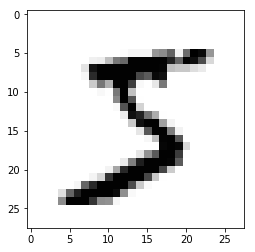

This image represents the number 5


In [3]:
# Change the value of i and re-run this cell to look at different samples. There's 60,000 to choose from!
i = 0

pyplot.imshow(x_train[i], cmap='Greys', interpolation='nearest')
pyplot.show()

print('This image represents the number', y_train[i])

## Preparing the data for training

Our neural network will have 784 neurons in the input layer - one for each pixel in a sample image. To prepare the data for training we'll reshape `x_train` and `x_test` so that each sample is a 1D array of 784 numbers.

In [4]:
x_train_prepared = x_train.reshape((60000, 784))
x_test_prepared = x_test.reshape((10000, 784))

We'll also change the values of `y_train` and `y_test` from integers to a categorical encoding. The new values will be arrays of length 10, where all the values are 0 except where the index is the desired number, which will be 1. For example, if the number represented in the image was 2, the cateorical encoding would be `[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]` (since the third position has index 2).
- Why do we need to do this? Because we're trying to categorize the images into ten groups, and it doesn't really make sense to say that any of those groups are "higher value" than any other. This kind of categorical encoding makes it easier for the neural network to process.

In [5]:
y_train_prepared = to_categorical(y_train)
y_test_prepared = to_categorical(y_test)

# Building the neural network

In [6]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) 
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

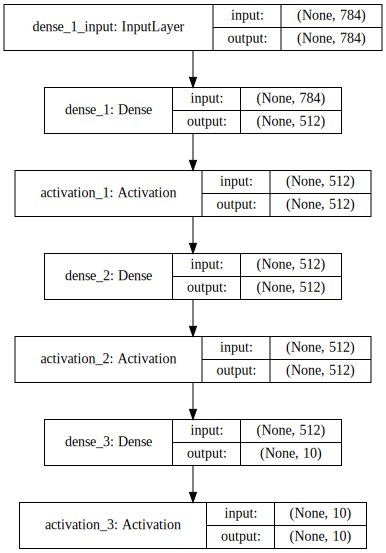

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))